In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from models import RVAEModel
from data_utils import DataFactory
tf.enable_eager_execution()
%matplotlib inline

/home/malzantot/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/malzantot/Nesl/bio_gan/ecg_dataset.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/malzantot/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/malzantot/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/malzantot/anaconda3/lib/python3.6/site-packages/ipykernel_launche

In [2]:
CHECKPOINT_DIR = './save/ecg_crnn/07_16_11_32'


In [3]:
ecg_train, ecg_test, metadata = DataFactory.create_dataset('ecg')

['1 NSR', '4 AFIB']
['1 NSR', '4 AFIB']
(array([0, 1], dtype=int32), array([211, 102]))
['1 NSR', '4 AFIB']
['1 NSR', '4 AFIB']
(array([0, 1], dtype=int32), array([72, 33]))


In [4]:
model = RVAEModel(enc_rnn_units=128,z_dim=16,dec_rnn_units=128,num_feats=metadata.num_feats,num_labels=metadata.num_labels)

In [5]:
checkpoint = tf.train.Checkpoint(model=model)
status = checkpoint.restore(tf.train.latest_checkpoint(CHECKPOINT_DIR))

## Display reconstruction

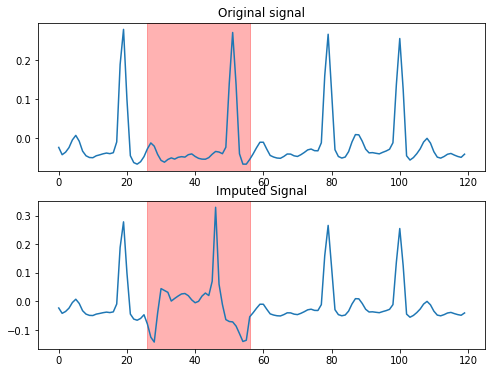

In [119]:
test_x, test_y = next(iter(ecg_test.batch(1)))

mask_len = 30
rand_pos = int(np.random.uniform(low=25, high=int(test_x.shape[1])-mask_len))
test_x2 = test_x.numpy()
mask = np.ones_like(test_x2)
drop_range = np.arange(rand_pos, rand_pos+mask_len)

mask[:,drop_range,:]=0

test_x_masked = np.multiply(mask, test_x2)
test_x2 = tf.convert_to_tensor(test_x_masked)
test_x_recon = model.impute(test_x2, test_y, mask)
fig, axes = plt.subplots(2,1, figsize=(8,6))
axes[1].plot( test_x_recon[0,:,0].numpy())
axes[1].axvspan(rand_pos, rand_pos+mask_len, color='red', alpha=0.3)
axes[0].set_title('Original signal')
axes[0].plot(test_x[0,:,0].numpy())
axes[0].axvspan(rand_pos, rand_pos+mask_len, color='red', alpha=0.3)
axes[1].set_title('Imputed Signal')
plt.savefig('imputation_result.png')